In [22]:
import pandas as pd
import numpy as np
import dask.dataframe as dd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy import signal
from scipy.stats import entropy
from statsmodels.tsa.stattools import adfuller
data = pd.read_parquet(r'C:\Users\jfu22\Downloads\feature.parq')
names = ['mid_prc'] + [f'feature_{i}' for i in range(1, data.shape[1])]
data.columns = names
data

,mid_prc,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_77,feature_78,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86
timestamp,,,,,,,,,,,,,,,,,,,,,
2025-04-16 00:00:05,1588.010010,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
2025-04-16 00:00:06,1587.824951,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,0.601331,...,0.023879,-1.795081,5.000000,5.000000,-0.614067,-5.000000,5.000000,5.000000,-0.774996,-5.000000
2025-04-16 00:00:07,1587.824951,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,0.322740,...,0.766593,5.000000,5.000000,5.000000,0.142544,3.931395,5.000000,5.000000,-0.024244,-3.626100
2025-04-16 00:00:08,1587.305054,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,...,-5.000000,-5.000000,-4.450434,-5.000000,-5.000000,-5.000000,-4.419014,-5.000000,-5.000000,-5.000000
2025-04-16 00:00:09,1587.285034,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,...,-5.000000,-5.000000,-4.941638,-5.000000,-5.000000,-5.000000,-4.966719,-5.000000,-5.000000,-5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-22 23:59:55,1755.185059,1.592446,1.272337,1.085889,1.085897,1.808142,1.540320,0.781662,0.772978,1.297135,...,0.927776,1.130970,1.416701,1.138098,0.603758,1.148668,1.395461,1.142015,0.385636,1.169348
2025-04-22 23:59:56,1755.185059,-0.445452,-0.207513,-0.236142,-0.236145,-0.388044,-0.064191,-0.665100,-0.659043,0.618027,...,0.832506,1.130444,1.250041,1.137565,0.564455,1.148124,1.247377,1.141478,0.357416,1.168783
2025-04-22 23:59:57,1755.574951,1.179695,0.758192,0.622311,0.622315,2.198675,1.170764,0.899781,0.889898,1.536343,...,1.076383,1.129958,1.010859,1.137072,0.800971,1.147622,1.001346,1.140982,0.605599,1.168262


In [3]:
date_range = pd.date_range(
    start = data.index.min(),
    end = data.index.max(),
    freq = 'min',
    tz = data.index.tz
)
data = data.reindex(date_range)

summary = pd.DataFrame({
    'column': len(data),
    'na columns': data.isna().sum(),
    'na percentage': data.isna().sum() / len(data),
    'inifinit data': np.isinf(data).sum()
})
print(summary)

            column  na columns  na percentage  inifinit data
mid_prc      10080           5       0.000496              0
feature_1    10080           5       0.000496              0
feature_2    10080           5       0.000496              0
feature_3    10080           5       0.000496              0
feature_4    10080           5       0.000496              0
...            ...         ...            ...            ...
feature_82   10080           5       0.000496              0
feature_83   10080           5       0.000496              0
feature_84   10080           5       0.000496              0
feature_85   10080           5       0.000496              0
feature_86   10080           5       0.000496              0

[87 rows x 4 columns]


In [4]:
na_df = data[data.isna().any(axis=1)]
data = data.ffill()

In [316]:
freq = 2
data[f're_{freq}min'] = np.log(data['mid_prc'] / data['mid_prc'].shift(freq)).dropna()
data['target_1min_ret'] = data[f're_{freq}min'].shift(-freq)
data = data.iloc[::freq, :]
data = data.dropna(axis=0)
freq_list = [5, 10, 20]
for freq in freq_list:
    pass
data

,mid_prc,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,re_2min,target_1min_ret
2025-04-16 00:02:05,1588.334961,-1.547028,-1.512948,-1.519988,-1.519988,-1.892903,-1.768207,-1.780538,-1.780538,0.044035,...,0.990082,1.505431,1.639734,1.395933,0.996875,1.504438,1.788736,1.407994,0.000205,0.000699
2025-04-16 00:04:05,1589.444946,-0.352910,-0.382372,-0.392431,-0.392431,-0.199103,-0.322126,-0.008813,-0.008813,1.688959,...,1.436208,1.030372,0.205859,0.908589,1.387731,1.027751,0.140271,0.888337,0.000699,-0.004069
2025-04-16 00:06:05,1582.989990,0.721959,0.723325,0.824983,0.824983,0.610688,0.494790,0.105409,0.105409,-1.434670,...,-1.922780,-1.396613,-2.864060,-1.347792,-1.920714,-1.400459,-2.776933,-1.361574,-0.004069,0.002968
2025-04-16 00:08:05,1587.694946,-0.272469,-0.022293,0.123789,0.123789,-0.363358,-0.742834,-0.493365,-0.493365,-0.091371,...,-0.961619,-1.377656,1.632534,1.015282,-0.962139,-1.381148,1.891632,1.000659,0.002968,-0.000643
2025-04-16 00:10:05,1586.675049,-0.597480,-0.392370,-0.236162,-0.236162,-0.577656,-0.857820,-0.686586,-0.686586,0.121228,...,0.616999,0.972881,0.695022,0.999744,0.870061,0.971694,0.754089,0.984301,-0.000643,-0.000763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-22 23:48:05,1759.984985,0.015036,0.001865,-0.025166,-0.025168,0.376500,0.342098,0.118856,0.116545,-0.979477,...,-1.653934,-0.932942,-1.595312,-0.953937,-1.633278,-0.929133,-1.428847,-0.947862,0.002122,0.001045
2025-04-22 23:50:05,1761.824951,-0.024375,-0.610698,-0.717601,-0.717609,0.552248,0.226369,0.053488,0.052004,1.082756,...,1.016195,1.087203,0.737603,1.072465,1.006171,1.090412,0.661068,1.080375,0.001045,-0.000960
2025-04-22 23:52:05,1760.135010,1.032348,0.966830,0.932176,0.932183,0.972649,0.922175,0.926818,0.915525,-0.133745,...,-0.896156,-0.933395,-1.335545,-0.947341,-0.922358,-0.929576,-1.376964,-0.942101,-0.000960,-0.000807
2025-04-22 23:54:05,1758.714966,-0.167623,0.298462,0.447842,0.447845,-0.564270,0.255620,-0.127589,-0.126978,-0.109108,...,0.261075,1.090145,-0.025150,-0.916068,0.323628,1.093666,-0.170264,-0.902729,-0.000807,-0.001303


In [317]:
na_df = data[data.isna().any(axis=1)]
print(na_df)

Empty DataFrame
Columns: [mid_prc, feature_1, feature_2, feature_3, feature_4, feature_5, feature_6, feature_7, feature_8, feature_9, feature_10, feature_11, feature_12, feature_13, feature_14, feature_15, feature_16, feature_17, feature_18, feature_19, feature_20, feature_21, feature_22, feature_23, feature_24, feature_25, feature_26, feature_27, feature_28, feature_29, feature_30, feature_31, feature_32, feature_33, feature_34, feature_35, feature_36, feature_37, feature_38, feature_39, feature_40, feature_41, feature_42, feature_43, feature_44, feature_45, feature_46, feature_47, feature_48, feature_49, feature_50, feature_51, feature_52, feature_53, feature_54, feature_55, feature_56, feature_57, feature_58, feature_59, feature_60, feature_61, feature_62, feature_63, feature_64, feature_65, feature_66, feature_67, feature_68, feature_69, feature_70, feature_71, feature_72, feature_73, feature_74, feature_75, feature_76, feature_77, feature_78, feature_79, feature_80, feature_81, fe

In [9]:
def preposses_data(data):
    for column in data.columns:
        median = data[column].median()
        mad = stats.median_abs_deviation(data[column])
        
        lower = median - 3 * mad * 1.48
        upper = median + 3 * mad * 1.48
        
        lower_mask = data[column] < lower
        data.loc[lower_mask, column] = lower
        
        upper_mask = data[column] > upper
        data.loc[upper_mask, column] = upper
    return data

In [319]:
data.head()

,mid_prc,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,re_2min,target_1min_ret
2025-04-16 00:02:05,1588.334961,-1.547028,-1.512948,-1.519988,-1.519988,-1.892903,-1.768207,-1.780538,-1.780538,0.044035,...,0.990082,1.505431,1.639734,1.395933,0.996875,1.504438,1.788736,1.407994,0.000205,0.000699
2025-04-16 00:04:05,1589.444946,-0.352910,-0.382372,-0.392431,-0.392431,-0.199103,-0.322126,-0.008813,-0.008813,1.605941,...,1.436208,1.030372,0.205859,0.908589,1.387731,1.027751,0.140271,0.888337,0.000699,-0.002327
2025-04-16 00:06:05,1582.989990,0.721959,0.723325,0.824983,0.824983,0.610688,0.494790,0.105409,0.105409,-1.434670,...,-1.922780,-0.738933,-2.462577,-1.165602,-1.920714,-0.807144,-2.685414,-1.361574,-0.002327,0.002339
2025-04-16 00:08:05,1587.694946,-0.272469,-0.022293,0.123789,0.123789,-0.363358,-0.742834,-0.493365,-0.493365,-0.091371,...,-0.961619,-0.738933,1.632534,1.015282,-0.962139,-0.807144,1.891632,1.000659,0.002339,-0.000643
2025-04-16 00:10:05,1586.675049,-0.597480,-0.392370,-0.236162,-0.236162,-0.577656,-0.857820,-0.686586,-0.686586,0.121228,...,0.616999,0.972881,0.695022,0.999744,0.870061,0.971694,0.754089,0.984301,-0.000643,-0.000763


<Axes: >

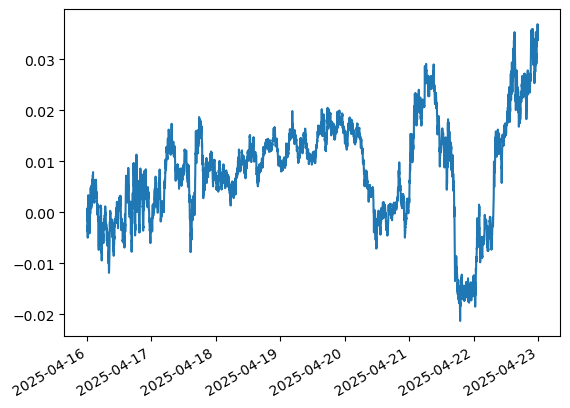

In [320]:
data['target_1min_ret'].cumsum().plot()

<Axes: >

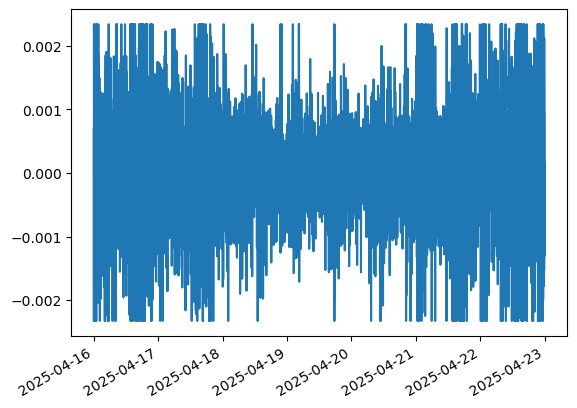

In [321]:
data['target_1min_ret'].plot()

In [322]:
frequencies, power = signal.periodogram(data['target_1min_ret'])

normalized_power = power / np.sum(power)

spectral_entropy = entropy(normalized_power)

print(f"Spectral Entropy: {spectral_entropy}")
print(f"Uniform Entropy: {np.log(len(data['target_1min_ret']))}")

adf_res = adfuller(data['target_1min_ret'])
print(f'p values of adf result : {adf_res[1]}')

Spectral Entropy: 7.401720403129911
Uniform Entropy: 8.524764456912555
p values of adf result : 0.0


In [323]:
chunk_size = 10
method = 'spearman'  # Fixed typo: 'spearson' -> 'spearman'

n_samples, n_features = data.shape
corr_matrix = np.zeros((n_features, n_features))
counts_matrix = np.zeros((n_features, n_features))

for i in range(0, n_samples, chunk_size):
    chunk_end = min(i + chunk_size, n_samples)
    chunk_data = data.iloc[i:chunk_end]
    
    # Drop rows with ANY NaN values (preserves all columns)
    chunk_clean = chunk_data.dropna()
    
    if len(chunk_clean) > 1:
        try:
            if method == 'pearson':
                chunk_corr = chunk_clean.corr().values
            elif method == 'spearman':
                chunk_corr = chunk_clean.corr(method='spearman').values
            
            # Ensure the chunk correlation matrix has the correct shape
            if chunk_corr.shape == (n_features, n_features):
                weight = len(chunk_clean)
                corr_matrix += chunk_corr * weight
                counts_matrix += np.ones_like(chunk_corr) * weight
            else:
                print(f"Chunk {i} shape mismatch: {chunk_corr.shape} vs ({n_features}, {n_features})")
                
        except Exception as e:
            print(f"Error processing chunk {i}: {e}")
            continue

# Avoid division by zero
counts_matrix[counts_matrix == 0] = 1
final_corr_matrix = corr_matrix / counts_matrix

# Convert to DataFrame
corr_df = pd.DataFrame(final_corr_matrix, index=data.columns, columns=data.columns)

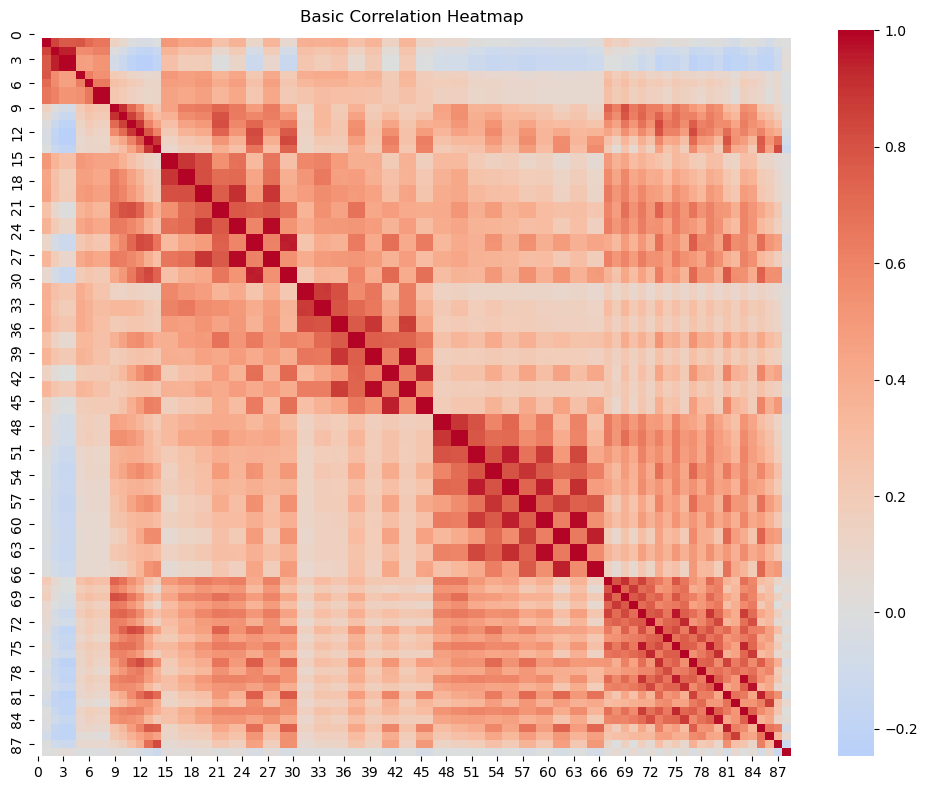

In [324]:
# Basic heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(final_corr_matrix, cmap='coolwarm', center=0)
plt.title('Basic Correlation Heatmap')
plt.tight_layout()
plt.show()

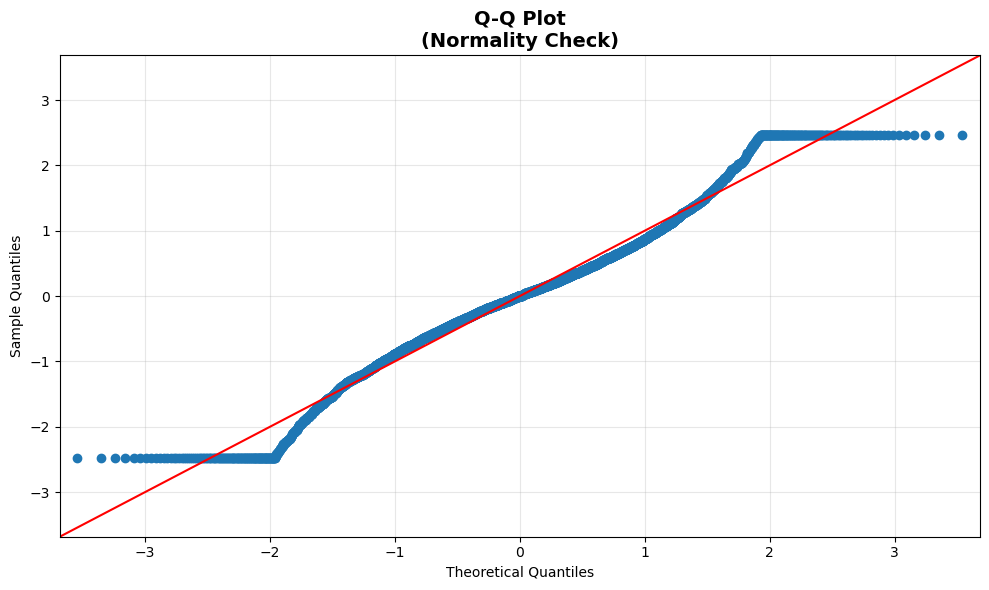

In [325]:
from statsmodels.graphics.gofplots import qqplot

def basic_qq_plot(data, title="Q-Q Plot", figsize=(10, 6)):
    """
    Create a basic Q-Q plot to check normality
    """
    fig, ax = plt.subplots(figsize=figsize)
    qqplot(data, line='45', fit=True, ax=ax)
    ax.set_title(f'{title}\n(Normality Check)', fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Usage
basic_qq_plot(data['target_1min_ret'])

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def grid_joint_plots(data, target_col, feature_cols=None, cols_per_row=4, 
                     kind='scatter', figsize_multiplier=3):
    """
    Create a grid of joint plots for easy comparison of target vs all features
    """
    if feature_cols is None:
        numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
        feature_cols = [col for col in numeric_cols if col != target_col]
    
    n_features = len(feature_cols)
    n_rows = (n_features + cols_per_row - 1) // cols_per_row  # Ceiling division
    
    fig_width = cols_per_row * figsize_multiplier
    fig_height = n_rows * figsize_multiplier
    
    fig, axes = plt.subplots(n_rows, cols_per_row, figsize=(fig_width, fig_height))
    
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    axes_flat = axes.ravel()
    
    for idx, feature_col in enumerate(feature_cols):
        ax = axes_flat[idx]
        
        ax.scatter(data[feature_col], data[target_col], alpha=0.5, s=20)
        
        mask = ~(data[feature_col].isna() | data[target_col].isna())
        x_clean = data[feature_col][mask]
        y_clean = data[target_col][mask]
        
        if len(x_clean) > 1:
            slope, intercept, r_value, p_value, std_err = stats.linregress(x_clean, y_clean)
            x_range = np.linspace(x_clean.min(), x_clean.max(), 100)
            y_pred = slope * x_range + intercept
            ax.plot(x_range, y_pred, 'r-', linewidth=1.5, alpha=0.8)
            
            corr = data[[feature_col, target_col]].corr().iloc[0, 1]
            ax.text(0.05, 0.95, f'r = {corr:.3f}', transform=ax.transAxes,
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.9),
                   fontsize=10, verticalalignment='top')
        
        ax.set_xlabel(feature_col, fontsize=10)
        ax.set_ylabel(target_col if idx % cols_per_row == 0 else '', fontsize=10)
        ax.tick_params(axis='both', which='major', labelsize=8)
        ax.grid(True, alpha=0.3)
        ax.set_title(f'{feature_col} vs {target_col}', fontsize=11, fontweight='bold')
    
    for idx in range(n_features, len(axes_flat)):
        axes_flat[idx].set_visible(False)

    plt.tight_layout()
    plt.show()

grid_joint_plots(data, 'target_1min_ret', cols_per_row=3, figsize_multiplier=3)

In [13]:
def mic(x, y, max_bins=10):
    """
    Simplified Maximal Information Coefficient (MIC)
    """
    # Remove NaN values
    mask = ~(np.isnan(x) | np.isnan(y))
    x, y = x[mask], y[mask]
    
    if len(x) < 10:
        return np.nan
    
    # Normalize to [0, 1]
    x = (x - x.min()) / (x.max() - x.min())
    y = (y - y.min()) / (y.max() - y.min())
    
    best_score = 0
    
    # Try different grid sizes
    for bins_x in range(2, max_bins + 1):
        for bins_y in range(2, max_bins + 1):
            # Create grid
            x_bins = np.linspace(0, 1, bins_x + 1)
            y_bins = np.linspace(0, 1, bins_y + 1)
            
            # 2D histogram
            hist, _, _ = np.histogram2d(x, y, bins=[x_bins, y_bins])
            p_xy = hist / hist.sum()  # Joint probability
            
            # Marginal probabilities
            p_x = p_xy.sum(axis=1)
            p_y = p_xy.sum(axis=0)
            
            # Mutual information
            mi = 0
            for i in range(bins_x):
                for j in range(bins_y):
                    if p_xy[i,j] > 0 and p_x[i] > 0 and p_y[j] > 0:
                        mi += p_xy[i,j] * np.log(p_xy[i,j] / (p_x[i] * p_y[j]))
            
            # Normalize by log(min(bins))
            score = mi / np.log(min(bins_x, bins_y))
            best_score = max(best_score, score)
    
    return min(best_score, 1.0)  # MIC is between 0 and 1

In [14]:

def measure_correlation(data):
    corr_dict = dict()
    for column in data.columns:
        if 'feature' in column:
            corr = stats.pearsonr(data[column], data['target_1min_ret'])
            spearman = stats.spearmanr(data[column], data['target_1min_ret'])
            mic_value = mic(data[column], data['target_1min_ret'])
            corr_dict[column] = [corr[0], spearman[0], mic_value]
    corr_df = pd.DataFrame.from_dict(corr_dict, orient='index', 
                                   columns=['pearson', 'spearman', 'mic'])
    print(corr_df)
    corr_df = corr_df.sort_values('mic', ascending=False)
    x = np.arange(len(corr_df))
    plt.bar(x=x - 0.35/3,height=corr_df['pearson'], label='pearson')
    #plt.bar(x=x + 0.35/3,height=corr_df['spearman'], label='spearman')
    plt.bar(x=x + 0.35*2/3,height=corr_df['mic'], label='mic')
    plt.legend()
    plt.show()
    return corr_df
#corr_df = measure_correlation(data)
#corr_df

In [329]:
mask = (abs(corr_df['pearson']) > 0.02)
linear_factor = corr_df[mask]
nonlinear_factor = corr_df[~mask]
print(linear_factor, '\n',nonlinear_factor)

             pearson  spearman       mic
feature_22  0.031614  0.024857  0.011547
feature_54  0.029551  0.024346  0.009030
feature_53  0.029561  0.024511  0.008880
feature_50  0.024305  0.022114  0.008657
feature_26  0.020656  0.007479  0.008592
feature_49  0.024387  0.022218  0.008482
feature_18  0.027121  0.031394  0.008213
feature_58  0.027287  0.017104  0.008176
feature_38  0.027367  0.015357  0.008134
feature_21  0.031357  0.025774  0.008101
feature_57  0.027185  0.017104  0.008001
feature_10  0.020329  0.023973  0.007762
feature_16  0.032806  0.035149  0.007427
feature_73  0.026167  0.019568  0.007364
feature_37  0.029654  0.016823  0.007015
feature_25  0.020462  0.007931  0.006996
feature_77  0.026929  0.016319  0.006974
feature_17  0.028934  0.032756  0.006807
feature_70  0.027497  0.015559  0.006331
feature_15  0.034341  0.035605  0.006228
feature_24  0.033045  0.035662  0.006090
feature_20  0.035433  0.038230  0.006052
feature_69  0.020310  0.022128  0.005992
feature_34  0.02

C:\Users\jfu22\AppData\Local\Temp\ipykernel_14052\1501383229.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1536.6433642578124' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  data.loc[lower_mask, column] = lower
C:\Users\jfu22\AppData\Local\Temp\ipykernel_14052\1501383229.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-2.9772742179967464' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  data.loc[lower_mask, column] = lower
C:\Users\jfu22\AppData\Local\Temp\ipykernel_14052\1501383229.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-2.8197205772064624' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  

            pearson  spearman  mic
feature_1       NaN       NaN    0
feature_2       NaN       NaN    0
feature_3       NaN       NaN    0
feature_4       NaN       NaN    0
feature_5       NaN       NaN    0
...             ...       ...  ...
feature_82      NaN       NaN    0
feature_83      NaN       NaN    0
feature_84      NaN       NaN    0
feature_85      NaN       NaN    0
feature_86      NaN       NaN    0

[86 rows x 3 columns]


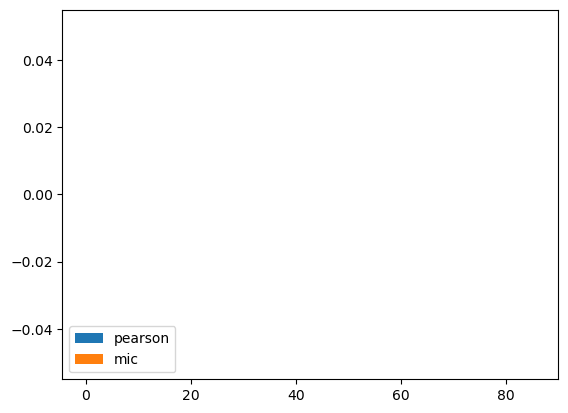

C:\Users\jfu22\AppData\Local\Temp\ipykernel_14052\1501383229.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1536.6433642578124' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  data.loc[lower_mask, column] = lower
C:\Users\jfu22\AppData\Local\Temp\ipykernel_14052\1501383229.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-2.9795247907191516' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  data.loc[lower_mask, column] = lower
C:\Users\jfu22\AppData\Local\Temp\ipykernel_14052\1501383229.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-2.8223457455821337' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  

             pearson  spearman       mic
feature_1   0.143426  0.153091  0.012319
feature_2   0.102231  0.108268  0.005905
feature_3   0.086307  0.090799  0.004291
feature_4   0.086307  0.090799  0.004291
feature_5   0.151870  0.166155  0.014715
...              ...       ...       ...
feature_82  0.019821  0.028624  0.000987
feature_83  0.045338  0.062102  0.003808
feature_84  0.043328  0.055171  0.003506
feature_85  0.020263  0.027306  0.002552
feature_86  0.016940  0.024452  0.000903

[86 rows x 3 columns]


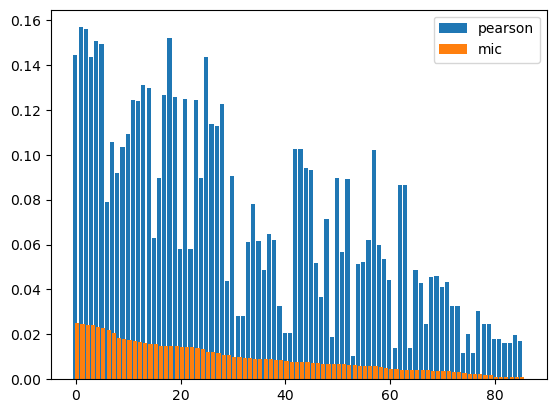

C:\Users\jfu22\AppData\Local\Temp\ipykernel_14052\1501383229.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1536.5989208984374' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  data.loc[lower_mask, column] = lower
C:\Users\jfu22\AppData\Local\Temp\ipykernel_14052\1501383229.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-2.983911156337708' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  data.loc[lower_mask, column] = lower
C:\Users\jfu22\AppData\Local\Temp\ipykernel_14052\1501383229.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-2.8233631359413267' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  d

             pearson  spearman       mic
feature_1   0.117774  0.136136  0.011087
feature_2   0.086080  0.098445  0.005247
feature_3   0.073662  0.083903  0.003830
feature_4   0.073662  0.083903  0.003830
feature_5   0.121366  0.144416  0.012529
...              ...       ...       ...
feature_82  0.011990  0.022445  0.000802
feature_83  0.033754  0.046047  0.002608
feature_84  0.031418  0.040022  0.002431
feature_85  0.013167  0.022322  0.002156
feature_86  0.010553  0.020155  0.000993

[86 rows x 3 columns]


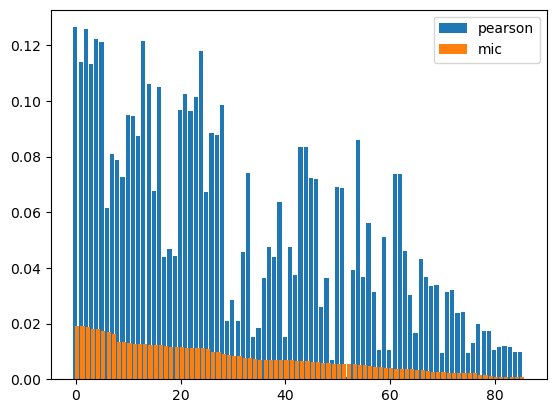

C:\Users\jfu22\AppData\Local\Temp\ipykernel_14052\1501383229.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1536.6433642578124' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  data.loc[lower_mask, column] = lower
C:\Users\jfu22\AppData\Local\Temp\ipykernel_14052\1501383229.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-2.9805577101185916' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  data.loc[lower_mask, column] = lower
C:\Users\jfu22\AppData\Local\Temp\ipykernel_14052\1501383229.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-2.811536311265081' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  d

             pearson  spearman       mic
feature_1   0.107850  0.127590  0.010003
feature_2   0.081418  0.094656  0.005026
feature_3   0.070532  0.081782  0.003660
feature_4   0.070532  0.081782  0.003660
feature_5   0.107610  0.134008  0.010980
...              ...       ...       ...
feature_82  0.010462  0.018027  0.000734
feature_83  0.028952  0.037020  0.001822
feature_84  0.026712  0.032062  0.002105
feature_85  0.009799  0.017093  0.001884
feature_86  0.008728  0.016217  0.001217

[86 rows x 3 columns]


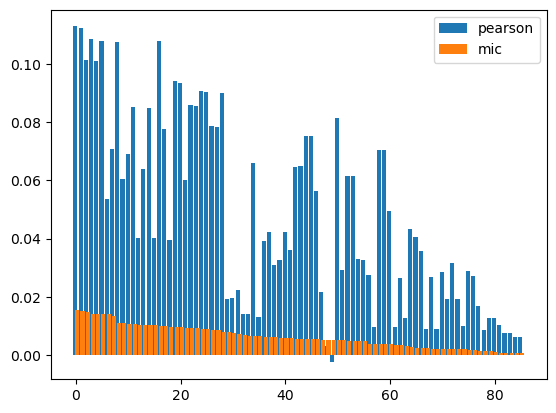

C:\Users\jfu22\AppData\Local\Temp\ipykernel_14052\1501383229.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1536.6433642578124' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  data.loc[lower_mask, column] = lower
C:\Users\jfu22\AppData\Local\Temp\ipykernel_14052\1501383229.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-2.988635737746954' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  data.loc[lower_mask, column] = lower
C:\Users\jfu22\AppData\Local\Temp\ipykernel_14052\1501383229.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-2.827166505400091' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  da

             pearson  spearman       mic
feature_1   0.095442  0.114454  0.008434
feature_2   0.073530  0.086070  0.004321
feature_3   0.064413  0.075306  0.003225
feature_4   0.064413  0.075306  0.003225
feature_5   0.092647  0.116958  0.009058
...              ...       ...       ...
feature_82  0.004472  0.011004  0.000746
feature_83  0.018955  0.024712  0.001195
feature_84  0.019691  0.022797  0.001935
feature_85  0.004835  0.011132  0.001994
feature_86  0.003211  0.009895  0.001194

[86 rows x 3 columns]


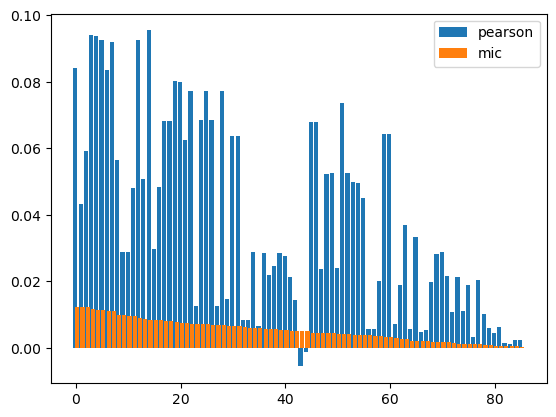

C:\Users\jfu22\AppData\Local\Temp\ipykernel_14052\1501383229.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1536.60947265625' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  data.loc[lower_mask, column] = lower
C:\Users\jfu22\AppData\Local\Temp\ipykernel_14052\1501383229.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-2.9918446589075027' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  data.loc[lower_mask, column] = lower
C:\Users\jfu22\AppData\Local\Temp\ipykernel_14052\1501383229.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-2.83082506775856' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  data

             pearson  spearman       mic
feature_1   0.092755  0.111047  0.008346
feature_2   0.071215  0.084684  0.004558
feature_3   0.061916  0.074218  0.003343
feature_4   0.061916  0.074218  0.003343
feature_5   0.090082  0.113682  0.008885
...              ...       ...       ...
feature_82  0.003281  0.007100  0.000676
feature_83  0.019104  0.021236  0.001002
feature_84  0.020461  0.018932  0.001967
feature_85  0.004841  0.008582  0.001834
feature_86  0.003767  0.008159  0.001276

[86 rows x 3 columns]


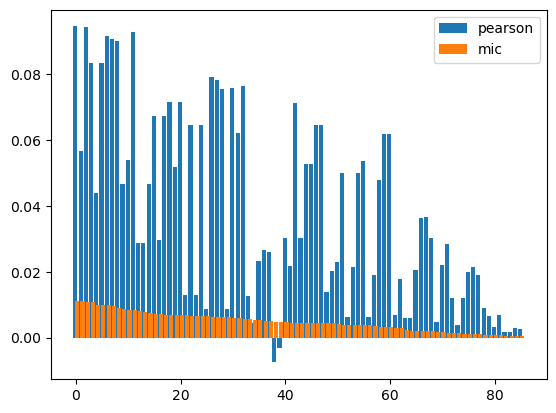

C:\Users\jfu22\AppData\Local\Temp\ipykernel_14052\1501383229.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1536.6433642578124' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  data.loc[lower_mask, column] = lower
C:\Users\jfu22\AppData\Local\Temp\ipykernel_14052\1501383229.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-2.987193998415023' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  data.loc[lower_mask, column] = lower
C:\Users\jfu22\AppData\Local\Temp\ipykernel_14052\1501383229.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-2.8331321509554983' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  d

             pearson  spearman       mic
feature_1   0.085568  0.104581  0.007671
feature_2   0.067549  0.080784  0.003962
feature_3   0.059904  0.071803  0.003117
feature_4   0.059904  0.071802  0.003117
feature_5   0.080854  0.104995  0.008026
...              ...       ...       ...
feature_82  0.003921  0.006205  0.000723
feature_83  0.011382  0.013283  0.000837
feature_84  0.014567  0.012900  0.001750
feature_85  0.002875  0.005441  0.001751
feature_86  0.001879  0.005360  0.001210

[86 rows x 3 columns]


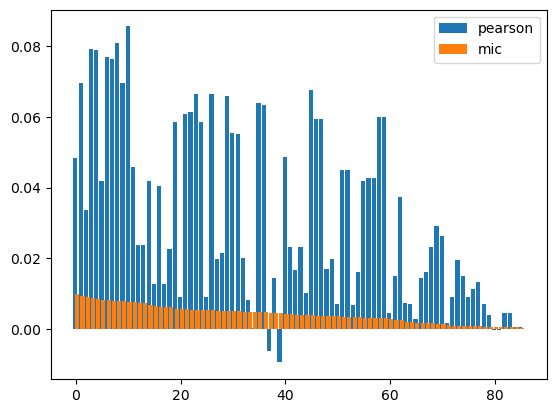

C:\Users\jfu22\AppData\Local\Temp\ipykernel_14052\1501383229.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1536.6089306640624' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  data.loc[lower_mask, column] = lower
C:\Users\jfu22\AppData\Local\Temp\ipykernel_14052\1501383229.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-2.976254194416106' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  data.loc[lower_mask, column] = lower
C:\Users\jfu22\AppData\Local\Temp\ipykernel_14052\1501383229.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-2.812467206045985' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  da

             pearson  spearman       mic
feature_1   0.084329  0.100540  0.006995
feature_2   0.067181  0.079222  0.004046
feature_3   0.059375  0.070237  0.003126
feature_4   0.059375  0.070237  0.003125
feature_5   0.078496  0.100240  0.007384
...              ...       ...       ...
feature_82  0.002114  0.003465  0.000689
feature_83  0.016418  0.013854  0.000942
feature_84  0.015105  0.011367  0.001835
feature_85  0.002349  0.003369  0.001560
feature_86  0.002357  0.005156  0.001055

[86 rows x 3 columns]


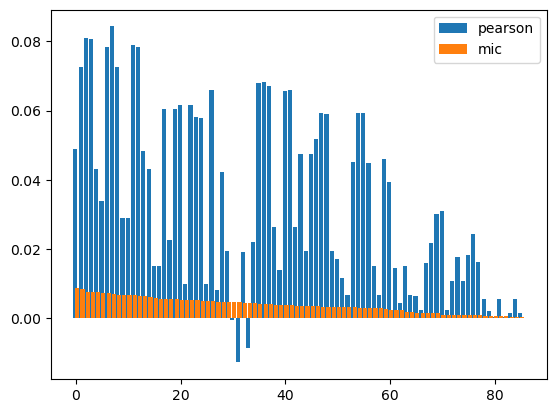

C:\Users\jfu22\AppData\Local\Temp\ipykernel_14052\1501383229.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1536.6777978515624' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  data.loc[lower_mask, column] = lower
C:\Users\jfu22\AppData\Local\Temp\ipykernel_14052\1501383229.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-2.9735649807751177' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  data.loc[lower_mask, column] = lower
C:\Users\jfu22\AppData\Local\Temp\ipykernel_14052\1501383229.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-2.810191464026575' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  d

             pearson  spearman       mic
feature_1   0.072488  0.088693  0.005690
feature_2   0.058543  0.071108  0.003482
feature_3   0.052630  0.063922  0.002673
feature_4   0.052630  0.063922  0.002674
feature_5   0.064582  0.086229  0.005712
...              ...       ...       ...
feature_82  0.000313  0.001101  0.000792
feature_83  0.013125  0.010319  0.000893
feature_84  0.007751  0.005184  0.001947
feature_85 -0.000448  0.001501  0.001781
feature_86 -0.000612  0.000769  0.001376

[86 rows x 3 columns]


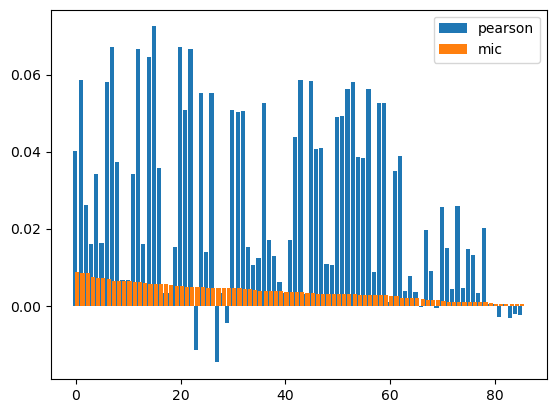

C:\Users\jfu22\AppData\Local\Temp\ipykernel_14052\1501383229.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1536.6533740234374' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  data.loc[lower_mask, column] = lower
C:\Users\jfu22\AppData\Local\Temp\ipykernel_14052\1501383229.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-2.9889594432339073' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  data.loc[lower_mask, column] = lower
C:\Users\jfu22\AppData\Local\Temp\ipykernel_14052\1501383229.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-2.833148950319737' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  d

             pearson  spearman       mic
feature_1   0.069295  0.086348  0.005607
feature_2   0.056477  0.069972  0.003312
feature_3   0.051003  0.063007  0.002605
feature_4   0.051003  0.063007  0.002603
feature_5   0.061051  0.081137  0.005255
...              ...       ...       ...
feature_82 -0.001213 -0.001450  0.000890
feature_83  0.005925  0.002208  0.000815
feature_84  0.004998  0.001640  0.001759
feature_85 -0.002430 -0.001452  0.001862
feature_86 -0.000985  0.000310  0.001341

[86 rows x 3 columns]


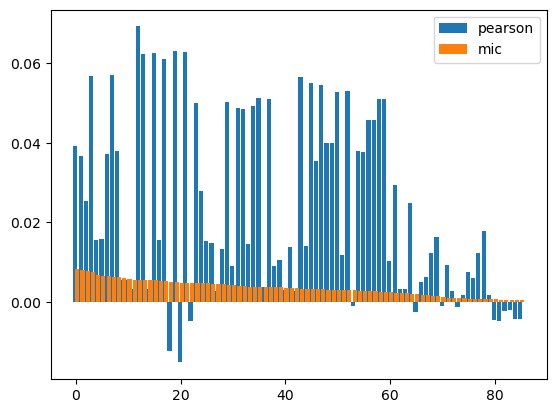

[[0.         0.0251531  0.01908627 0.01533931 0.01234682 0.01111201
  0.0098768  0.00869752 0.00866248 0.00829402]
 [0.         0.02452994 0.01906754 0.01505163 0.01232653 0.01099526
  0.00932107 0.0083378  0.00851525 0.00790655]
 [0.         0.02402893 0.01866482 0.01468777 0.01223126 0.01094908
  0.00922929 0.00772616 0.0083605  0.00768901]
 [0.         0.02401949 0.01807241 0.01419476 0.01172086 0.01073553
  0.00873799 0.00765736 0.00740112 0.00759551]
 [0.         0.02315053 0.01789841 0.0140544  0.01156796 0.00986605
  0.00858726 0.0075633  0.00727536 0.00664359]
 [0.         0.02276045 0.01749264 0.01397643 0.01140807 0.00984367
  0.00821808 0.00744137 0.00722558 0.0065729 ]
 [0.         0.02213894 0.01712485 0.01391435 0.01108735 0.00975342
  0.00821658 0.00738447 0.00695969 0.00655232]
 [0.         0.02053312 0.01617849 0.01322903 0.01100828 0.0096514
  0.00803059 0.00699495 0.0064749  0.00625085]
 [0.         0.01832715 0.01349268 0.01097987 0.0100078  0.00888501
  0.00802557 

In [26]:
mic_matrix = np.zeros((86, 10))
for freq in range(1, 11):
    new_data = data.copy()
    new_data[f're_{freq}min'] = np.log(new_data['mid_prc'] / new_data['mid_prc'].shift(freq)).dropna()
    new_data['target_1min_ret'] = new_data[f're_{freq}min'].shift(-freq)
    new_data = new_data.iloc[::freq, :]
    new_data = new_data.dropna(axis=0)
    new_data = preposses_data(new_data)
    corr_matrix = measure_correlation(new_data)
    
    mic_matrix[:, freq - 1] = corr_matrix.loc[:, 'mic']

print(mic_matrix)
print(data)



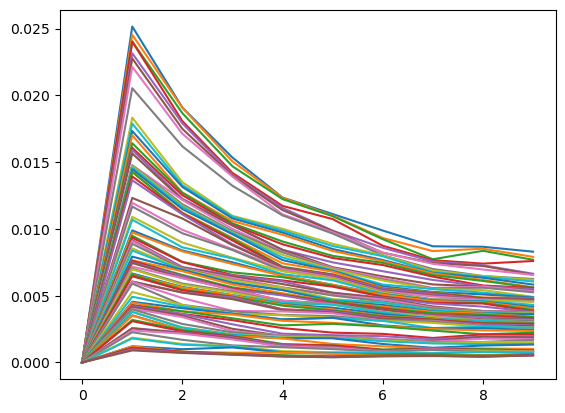

In [27]:
for i in range(mic_matrix.shape[0]):
    plt.plot(mic_matrix[i,:])
plt.show()